# 第9章　3Ｄサーファイスで見える世界
## 9.1 ヒストグラムの利用

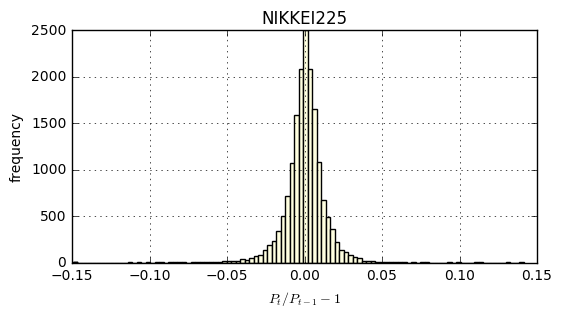

In [1]:
%matplotlib inline
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
n225 = pdr.DataReader("NIKKEI225", 'fred',"1949/5/16").dropna()
rn225=n225.pct_change().dropna()
plt.figure(figsize=(6,3))
ax=plt.subplot(1,1,1)
rn225.hist(bins=100,color='lightyellow',ax=ax)
plt.xlabel('$P_{t}/P_{t-1}-1$')
plt.ylabel('frequency')

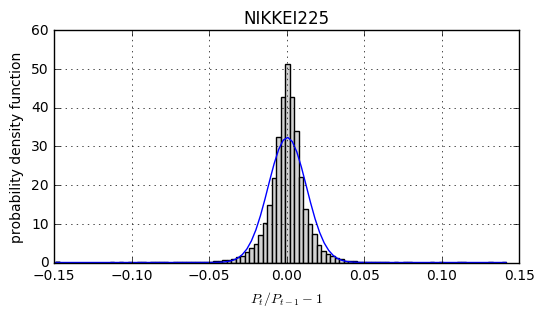

In [2]:
from scipy.stats import norm
fig=plt.figure(figsize=(6,3))
ax=plt.subplot(1,1,1)
x=np.linspace(float(rn225.min()),float(rn225.max()),100)
pdf=norm.pdf(x,rn225.mean(),rn225.std())
rn225.hist(bins=100,color='lightgray',normed=True,ax=ax)
plt.plot(x,pdf)
plt.xlabel('$P_{t}/P_{t-1}-1$')
plt.ylabel('probability density function')

In [3]:
print("mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
%(rn225.mean(),rn225.std(),rn225.skew(),rn225.kurt()))

mean 0.00035 std 0.01235 skew -0.14205 kurt 9.52517


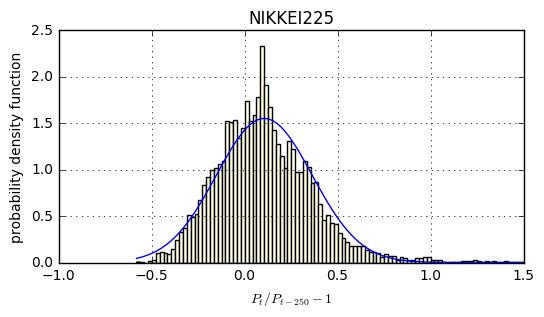

In [4]:
fig=plt.figure(figsize=(6,3))
ax=plt.subplot(1,1,1)
r250n225=n225.pct_change(250).dropna()
x=np.linspace(float(r250n225.min()),float(r250n225.max()),100)
pdf=norm.pdf(x,r250n225.mean(),r250n225.std())
r250n225.hist(bins=100,color='lightyellow',normed=True,ax=ax)
plt.plot(x,pdf)
plt.xlabel('$P_{t}/P_{t-250}-1$')
plt.ylabel('probability density function')

In [5]:
print("mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
%(r250n225.mean(),r250n225.std(),r250n225.skew(),r250n225.kurt()))

mean 0.10559 std 0.25750 skew 0.79479 kurt 1.76912


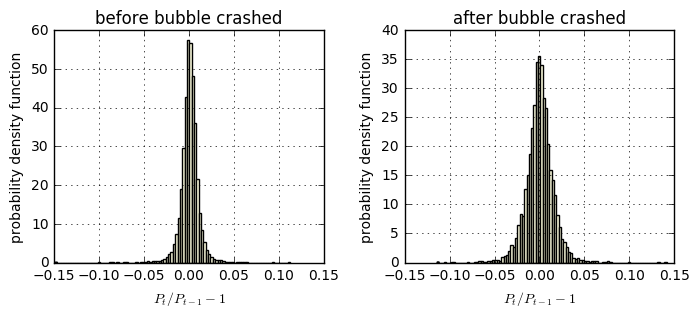

In [6]:
plt.figure(figsize=(8,3))
ax=plt.subplot(1,2,1)
before=rn225.ix[:'1989/12/31']
before.hist(ax=ax,bins=100,color='lightyellow',normed=True)
plt.title('before bubble crashed')
plt.xlabel('$P_{t}/P_{t-1}-1$')
plt.ylabel('probability density function')
ax2=plt.subplot(1,2,2)
after=rn225.ix['1989/12/31':]
after.hist(ax=ax2,bins=100,color='lightyellow',normed=True)
plt.title('after bubble crashed')
plt.xlabel('$P_{t}/P_{t-1}-1$')
plt.ylabel('probability density function')

In [7]:
print("before crashed: mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
%(before.mean(),before.std(),before.skew(),before.kurt()))
print("after crashed: mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
%(after.mean(),after.std(),after.skew(),after.kurt()))

before crashed: mean 0.00058 std 0.00987 skew -0.44466 kurt 15.46825
after crashed: mean -0.00001 std 0.01542 skew 0.03502 kurt 5.36074


In [8]:
before250=r250n225.ix[:'1989/12/31']
print("before crashed: mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
%(before250.mean(),before250.std(),before250.skew(),before250.kurt()))
after250=r250n225.ix['1989/12/31':]
print("after crashed: mean %2.5f std %2.5f skew %2.5f kurt %2.5f"\
%(after250.mean(),after250.std(),after250.skew(),after250.kurt()))

before crashed: mean 0.17481 std 0.24833 skew 1.12898 kurt 2.74224
after crashed: mean 0.00121 std 0.23493 skew 0.50706 kurt -0.12505


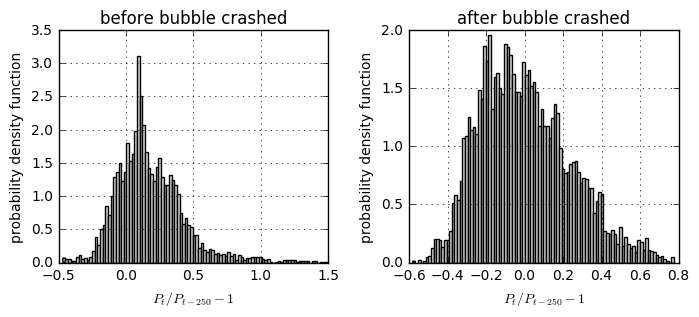

In [9]:
plt.figure(figsize=(8,3))
ax3=plt.subplot(1,2,1)
before250.hist(ax=ax3,bins=100,color='lightgray',normed=True)
plt.title('before bubble crashed')
plt.xlabel('$P_{t}/P_{t-250}-1$')
plt.ylabel('probability density function')
ax4=plt.subplot(1,2,2)
after250.hist(ax=ax4,bins=100,color='lightgray',normed=True)
plt.title('after bubble crashed')
plt.xlabel('$P_{t}/P_{t-250}-1$')
plt.ylabel('probability density function')

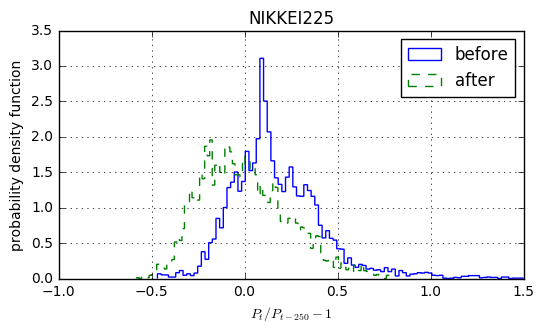

In [10]:
plt.figure(figsize=(6,3.2))
ax5=plt.subplot(1,1,1)
before250.hist(ax=ax5,bins=100,normed=True,label='before',histtype="step")
after250.hist(ax=ax5,bins=100,normed=True,label='after',histtype="step",linestyle='--')
plt.xlabel('$P_{t}/P_{t-250}-1$')
plt.ylabel('probability density function')
plt.legend()

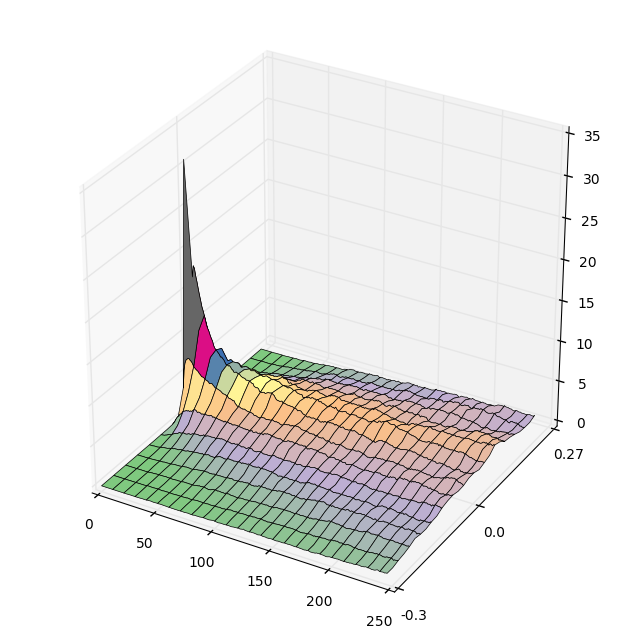

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
rmax=float(n225.pct_change(10).max())
rmin=float(n225.pct_change(10).min())
rmax=int(rmax*100)/100.0
rmin=int(rmin*100)/100.0
nbins=30
dx=(rmax-rmin)/nbins
rc=int(rmin/2+rmax/2)/100.0
bins = np.arange(rmin, rmax, dx)
xyz=[]
k=0
start=1
end=250
for i in range(start,end):
    tmp=n225.pct_change(i).dropna()
    nn225=np.array(tmp)
    n, bin, rectangles = ax.hist(nn225, bins,normed=True)
    xyz.append([])
    for j in range(len(bins)-1):
        xyz[k].append(n[j])
    k+=1
xyz=np.array(xyz)
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
Y = np.arange(0, len(n), 1)
X = np.arange(0, k-2, 1)
X, Y = np.meshgrid(X, Y)
Z = xyz[X,Y]#np.sqrt(X**2 + Y**2)
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=10, cmap=cm.Accent,
                       linewidth=0.5, antialiased=True)
plt.yticks([0,int(nbins/2),int(nbins)],[rmin,rc,rmax])
ax.set_xlabel='days'
ax.set_ylabel='ror'

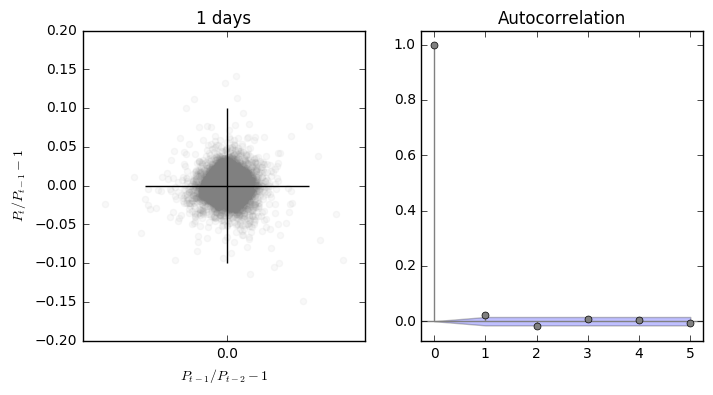

In [12]:
import statsmodels.api as sm
fig = plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
plt.scatter(rn225,rn225.shift(1),color='gray',alpha=0.05)
plt.xticks([-0.2,0,0.2])
plt.title('1 days')
plt.xlabel('$P_{t-1}/P_{t-2}-1$')
plt.ylabel('$P_{t}/P_{t-1}-1$')
plt.hlines([0],-0.1,0.1)
plt.vlines([0],-0.1,0.1)
ax2=fig.add_subplot(1,2,2)
fig=sm.graphics.tsa.plot_acf(rn225.squeeze(), lags=5,ax=ax2,color='gray')

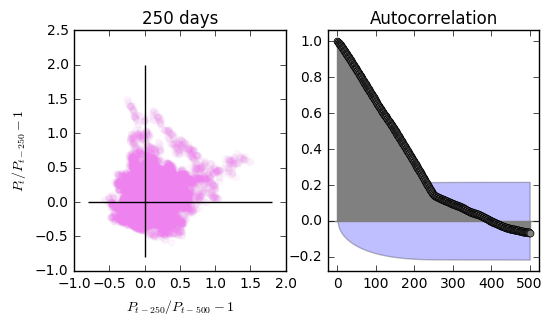

In [13]:
fig=plt.figure(figsize=(6,3.1))
ax1=fig.add_subplot(1,2,1)
plt.scatter(r250n225,r250n225.shift(250),color='violet',alpha=0.05)
plt.title('250 days')
plt.xlabel('$P_{t-250}/P_{t-500}-1$')
plt.ylabel('$P_{t}/P_{t-250}-1$')
plt.hlines([0],-0.8,1.8)
plt.vlines([0],-0.8,2)
ax2=fig.add_subplot(1,2,2)
fig=sm.graphics.tsa.plot_acf(r250n225.squeeze(),lags=500,ax=ax2,color='gray')

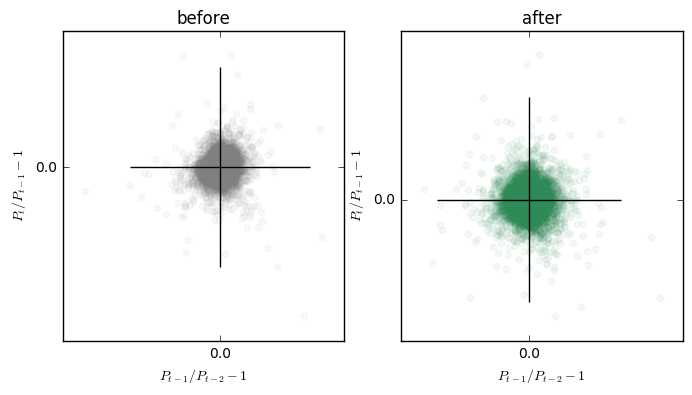

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(before,before.shift(1),color='gray',alpha=0.05)
plt.xticks([-0.2,0,0.2])
plt.yticks([-0.2,0,0.2])
plt.hlines([0],-0.1,0.1)
plt.vlines([0],-0.1,0.1)
plt.title('before')
plt.xlabel('$P_{t-1}/P_{t-2}-1$')
plt.ylabel('$P_{t}/P_{t-1}-1$')
plt.subplot(122)
plt.scatter(after,after.shift(1),color='seagreen',alpha=0.05)
plt.xticks([-0.2,0,0.2])
plt.yticks([-0.2,0,0.2])
plt.hlines([0],-0.1,0.1)
plt.vlines([0],-0.1,0.1)
plt.title('after')
plt.xlabel('$P_{t-1}/P_{t-2}-1$')
plt.ylabel('$P_{t}/P_{t-1}-1$')

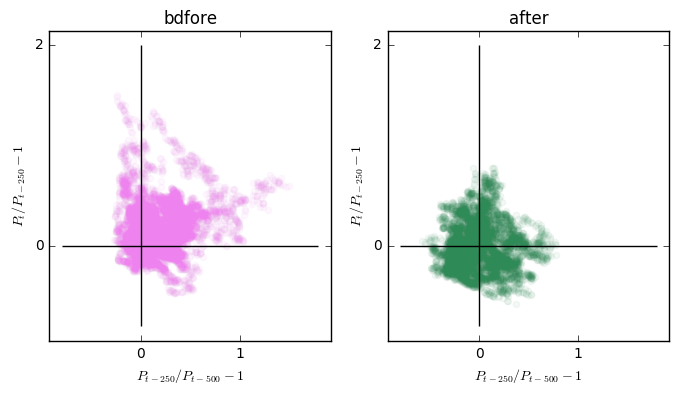

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(before250,before250.shift(250),color='violet',alpha=0.05)
plt.xticks([-1,0,1])
plt.yticks([-1,0,2])
plt.hlines([0],-0.8,1.8)
plt.vlines([0],-0.8,2)
plt.title('bdfore')
plt.xlabel('$P_{t-250}/P_{t-500}-1$')
plt.ylabel('$P_{t}/P_{t-250}-1$')
plt.subplot(122)
plt.scatter(after250,after250.shift(250),color='seagreen',alpha=0.05)
plt.xticks([-1,0,1])
plt.yticks([-1,0,2])
plt.hlines([0],-0.8,1.8)
plt.vlines([0],-0.8,2)
plt.title('after')
plt.xlabel('$P_{t-250}/P_{t-500}-1$')
plt.ylabel('$P_{t}/P_{t-250}-1$')

16791 6595 10195


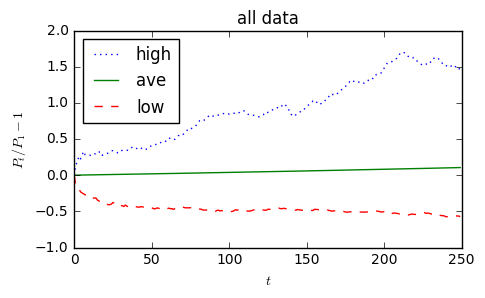

In [16]:
plt.figure(figsize=(5,2.8))
high=[0]*250
low=[0]*250
ave=[0]*250
for i in range(250):
    high[i]=float(n225.pct_change(i).max())
    ave[i]=float(n225.pct_change(i).mean())
    low[i]=float(n225.pct_change(i).min())
plt.plot(high,label="high", linestyle=':')
plt.plot(ave,label='ave')
plt.plot(low,label='low',linestyle='--')
plt.legend(loc='upper left')
plt.title('all data')
plt.xlabel('$t$')
plt.ylabel('$P_{t}/P_{1}-1$')
print(len(n225),len(after),len(before))

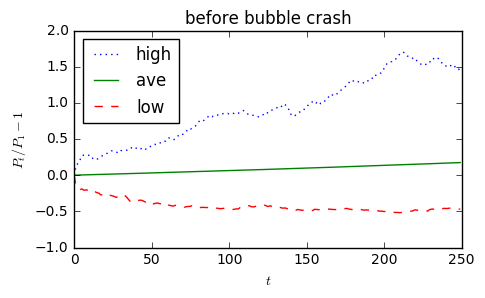

In [17]:
plt.figure(figsize=(5,2.8))
high=[0]*250;low=[0]*250;ave=[0]*250
for i in range(250):
    high[i]=float(n225.ix[:'1989/12/31'].pct_change(i).max())
    ave[i]=float(n225.ix[:'1989/12/31'].pct_change(i).mean())
    low[i]=float(n225.ix[:'1989/12/31'].pct_change(i).min())
plt.plot(high,label="high",linestyle=':')
plt.plot(ave,label='ave')
plt.plot(low,label='low',linestyle='--')
plt.legend(loc='upper left')
plt.title('before bubble crash')
plt.xlabel('$t$')
plt.ylabel('$P_{t}/P_{1}-1$')

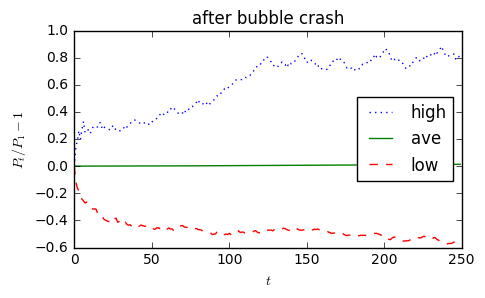

In [18]:
plt.figure(figsize=(5,2.8))
high=[0]*250;low=[0]*250;ave=[0]*250
for i in range(250):
    high[i]=float(n225.ix['1991/3/1':].pct_change(i).max())
    ave[i]=float(n225.ix['1991/3/1':].pct_change(i).mean())
    low[i]=float(n225.ix['1991/3/1':].pct_change(i).min())
plt.plot(high,label="high",linestyle=':')
plt.plot(ave,label='ave')
plt.plot(low,label='low',linestyle='--')
plt.legend(loc='center right')
plt.title('after bubble crash')
plt.xlabel('$t$')
plt.ylabel('$P_{t}/P_{1}-1$')